<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I want to use this data set to evaluate several things about New York City's building infrastructure, starting with just an overall breakdown of the types of buildings. This dataset looks at more than this though, featuring several indicators on how enviornmentally sound a building is, along with age associated with said building. I think it will be interesting to evaluate how energy efficiency has changed (if at all). This process should allow for some data manipulation, mutations and visualizaitons.

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Pull data from GitHub repository

In [2]:
link = 'https://raw.githubusercontent.com/jonburns2454/DATA-602/main/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240306.csv'
df = pd.read_csv(link)

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



## Summary Statistics
* The initial describe() shows that there are some improperly formated columns in the data frame.
* Thus several columns will need to change from 'object' --> 'float64' or numeric

In [3]:
df.describe()


,Report Year,Year Built,Property GFA - Self-Reported (ft²)
count,10974.0,10974.000000,1.097400e+04
mean,2022.0,1943.842901,1.673518e+05
std,0.0,36.386154,3.583351e+05
min,2022.0,1600.000000,1.000000e+00
25%,2022.0,1917.000000,4.179625e+04
50%,2022.0,1929.000000,7.235200e+04
75%,2022.0,1969.000000,1.565045e+05
max,2022.0,2088.000000,1.343508e+07


Weird that describe() is only showing me three column statsistics, could be that the rest of the columns are not nummeric.
- Running info() should provide the column type information.
* info() shows that there is one float variable, 8 objects and 2 ints, While the int and floats make sense for the data they represent, the objects are going to need to be switched to float for my purposes.
* Judging by the initial look at the data, they are 'objects' because instead of having 'NaN' or 'NA' it has a string saying 'Missing Value'. This means each column is housing more than one data type.
* I will use apply(error = 'coalese') to force the non_numeric values into numeric format

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10974 entries, 0 to 10973
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Report Year                                              10974 non-null  int64  
 1   NYC Borough, Block and Lot (BBL)                         10974 non-null  object 
 2   City                                                     10974 non-null  object 
 3   Primary Property Type                                    10974 non-null  object 
 4   Year Built                                               10974 non-null  int64  
 5   ENERGY STAR Score                                        10974 non-null  object 
 6   Site Energy Use (kBtu)                                   10974 non-null  object 
 7   Weather Normalized Site Energy Use (kBtu)                10974 non-null  object 
 8   Total (Location-Based) GHG

In [5]:
cols_to_convert = ['ENERGY STAR Score', 'Site Energy Use (kBtu)', 'Weather Normalized Site Energy Use (kBtu)', 'Total (Location-Based) GHG Emissions (Metric Tons CO2e)']
new_df = df.copy()
new_df[cols_to_convert] = new_df[cols_to_convert].apply(pd.to_numeric, errors = 'coerce') 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10974 entries, 0 to 10973
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Report Year                                              10974 non-null  int64  
 1   NYC Borough, Block and Lot (BBL)                         10974 non-null  object 
 2   City                                                     10974 non-null  object 
 3   Primary Property Type                                    10974 non-null  object 
 4   Year Built                                               10974 non-null  int64  
 5   ENERGY STAR Score                                        8680 non-null   float64
 6   Site Energy Use (kBtu)                                   10663 non-null  float64
 7   Weather Normalized Site Energy Use (kBtu)                10165 non-null  float64
 8   Total (Location-Based) GHG

In [6]:
new_df.describe()

,Report Year,Year Built,ENERGY STAR Score,Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Total (Location-Based) GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²)
count,10974.0,10974.000000,8680.000000,1.066300e+04,1.016500e+04,10896.000000,1.097400e+04
mean,2022.0,1943.842901,62.476959,1.554294e+07,1.491302e+07,1033.134251,1.673518e+05
std,0.0,36.386154,29.128276,6.328967e+07,5.255952e+07,4001.673999,3.583351e+05
min,2022.0,1600.000000,1.000000,-4.277611e+05,-4.277611e+05,-36.200000,1.000000e+00
25%,2022.0,1917.000000,42.000000,3.048624e+06,3.063400e+06,196.200000,4.179625e+04
50%,2022.0,1929.000000,69.000000,5.487257e+06,5.486436e+06,362.300000,7.235200e+04
75%,2022.0,1969.000000,87.000000,1.147006e+07,1.152043e+07,770.875000,1.565045e+05
max,2022.0,2088.000000,100.000000,3.322612e+09,1.632190e+09,213051.200000,1.343508e+07


# Missing Values

In [7]:
missing_data = new_df.isna().sum()
missing_data

Report Year                                                   0
NYC Borough, Block and Lot (BBL)                              0
City                                                          0
Primary Property Type                                         0
Year Built                                                    0
ENERGY STAR Score                                          2294
Site Energy Use (kBtu)                                      311
Weather Normalized Site Energy Use (kBtu)                   809
Total (Location-Based) GHG Emissions (Metric Tons CO2e)      78
Property GFA - Self-Reported (ft²)                            0
Address 1                                                     0
dtype: int64

## Percentage of data missing
* Given the missing data, are there any variables that might be an issue?
* The energy star score hass around 20.9% missing and could present some problems down the road

In [8]:
perc_missing = (new_df.isna().sum()/ len(new_df))*100
perc_missing

Report Year                                                 0.000000
NYC Borough, Block and Lot (BBL)                            0.000000
City                                                        0.000000
Primary Property Type                                       0.000000
Year Built                                                  0.000000
ENERGY STAR Score                                          20.903955
Site Energy Use (kBtu)                                      2.833971
Weather Normalized Site Energy Use (kBtu)                   7.371970
Total (Location-Based) GHG Emissions (Metric Tons CO2e)     0.710771
Property GFA - Self-Reported (ft²)                          0.000000
Address 1                                                   0.000000
dtype: float64

# Data Wrangling

Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables. 

8. Filter your data based on some condition. 

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group. 
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups. 

### Starting with name changes, making the data easier to work with

In [9]:
df_rename = new_df.rename(columns = {
    'NYC Borough, Block and Lot (BBL)': 'NYC_Borough',
    'Weather Normalized Site Energy Use (kBtu)': 'Site_Energy',
    'Total (Location-Based) GHG Emissions (Metric Tons CO2e)': 'Total_GHG_Emissions',
    'Property GFA - Self-Reported (ft²)': "Property_GFA",
    'Year Built': 'Year_Built',
    'ENERGY STAR Score': 'Energy_Star_Score',
    'Primary Property Type': 'Primary_Property_Type'
})
df_wrangling = df_rename
df_wrangling.columns


Index(['Report Year', 'NYC_Borough', 'City', 'Primary_Property_Type',
       'Year_Built', 'Energy_Star_Score', 'Site Energy Use (kBtu)',
       'Site_Energy', 'Total_GHG_Emissions', 'Property_GFA', 'Address 1'],
      dtype='object')

## Checking for duplicates and removing unnessesary columns
* Because this data is a single year (2022) evaluating a singular building there shouldnt be any duplicate values in the address column.

In [10]:
duplicate_address = df_wrangling.duplicated(subset = 'Address 1').sum()
duplicate_address

450

#### Creating a new variable that marks whether a value is a duplicate
* This will allow for some grouping filtering to see if the duplicate makes any sense.
* dupe variables will be coded as 1

In [11]:
df_wrangling['Is_Duplicated'] = df_wrangling.duplicated(subset='Address 1').astype(int)

#### Subset the newly made variable to look more indepth at the duplicates
* First taking a look at the missing values

In [12]:
dupe_df = df_wrangling[df_wrangling['Is_Duplicated'] == 1]
missing_dupe = dupe_df.isna().sum()
missing_dupe

Report Year                 0
NYC_Borough                 0
City                        0
Primary_Property_Type       0
Year_Built                  0
Energy_Star_Score         172
Site Energy Use (kBtu)     67
Site_Energy                89
Total_GHG_Emissions         6
Property_GFA                0
Address 1                   0
Is_Duplicated               0
dtype: int64

##### What is the percent missing?
* Compared with the original missingness check above, this tells me that dupe columns have a higher percentage missing than the overall dataset. Resulting in much less trust in the data.

In [13]:
perc_missing_dupes = (dupe_df.isna().sum()/ len(dupe_df))*100
perc_missing_dupes

Report Year                0.000000
NYC_Borough                0.000000
City                       0.000000
Primary_Property_Type      0.000000
Year_Built                 0.000000
Energy_Star_Score         38.222222
Site Energy Use (kBtu)    14.888889
Site_Energy               19.777778
Total_GHG_Emissions        1.333333
Property_GFA               0.000000
Address 1                  0.000000
Is_Duplicated              0.000000
dtype: float64

#### Recoding values to make calculations easier
* The City colulmn has several strings that all relate to the same place, New York
* Thus, this expression will take the values that say something other than 'New York' and re-code them to 'New York'
* A lot of the non 'New York' classifications are simply spelling differences, but all are New York nontheless. 
* I will also convert all letters to lowercase in the 'City" column

In [14]:
def replace_with_new_york(df_wrangling, City):
    for index, value in enumerate(df_wrangling['City']):
        if value != 'New York':
            df_wrangling.at[index, 'City'] = 'New York'
replace_with_new_york(df_wrangling, 'City')

## Test this function actually worked, if it did there should only be one unique value for 'City' variable
df_wrangling['City'] = df_wrangling['City'].str.lower()

df_wrangling['City'].unique()


array(['new york'], dtype=object)

#### Dropping Variables
* Last modification will be removal of variables that are not needed for the analysis
* While address and locational data would be an interesting piece, it is not the focus of this project, so I will remove them

In [15]:

columns_to_drop = ['NYC_Borough', 'Address 1']# While address and locational data would be an interesting piece, it is not the focus of this project, so I will remove them
df_wrangling.drop(columns=columns_to_drop, inplace=True)

In [16]:
df_wrangling.columns

Index(['Report Year', 'City', 'Primary_Property_Type', 'Year_Built',
       'Energy_Star_Score', 'Site Energy Use (kBtu)', 'Site_Energy',
       'Total_GHG_Emissions', 'Property_GFA', 'Is_Duplicated'],
      dtype='object')

## Grouping
* I want to take a look at the top 10 most prevalent property types when grouping.

In [17]:
property_type_counts = df_wrangling['Primary_Property_Type'].value_counts()

# Sort the counts in descending order
sorted_prop_counts = property_type_counts.sort_values(ascending=False)

# Select the top 10 most prevalent classes
top_10_prop_types = sorted_prop_counts.head(5)

top_10_prop_types

Primary_Property_Type
Multifamily Housing    7047
Office                 1688
Hotel                   428
K-12 School             324
College/University      207
Name: count, dtype: int64

Only looking at the top 10 most prevalent since there were so many single unique instances. This will make grouping more straightforward.

In [18]:
df_wrangling['Primary_Property_Type'] = df_wrangling['Primary_Property_Type'].apply(lambda x: x if x in top_10_prop_types else 'Other')

Lastly some grouping and analysis:

In [19]:
## Starting with a simple groupby() of the classification variable 'Sector Type''

prop_type_group_stats = df_wrangling.groupby(['Primary_Property_Type']).agg({
     'Year_Built': ['mean', 'min', 'max', 'count'],
     'Energy_Star_Score': ['mean', 'min', 'max'],
     'Site Energy Use (kBtu)': ['mean', 'min', 'max'],
     'Total_GHG_Emissions': ['mean', 'min', 'max'],
     'Property_GFA': ['mean', 'min', 'max']

})
prop_type_group_stats

Year_Built                   Energy_Star_Score       \
                              mean   min   max count              mean  min   
Primary_Property_Type                                                         
College/University     1945.149758  1857  2021   207               NaN  NaN   
Hotel                  1966.093458  1805  2021   428         48.689055  1.0   
K-12 School            1952.929012  1882  2020   324         59.184211  1.0   
Multifamily Housing    1944.524762  1827  2088  7047         61.599111  1.0   
Office                 1932.337085  1600  2022  1688         71.087935  1.0   
Other                  1945.310937  1833  2021  1280         60.729792  1.0   

                             Site Energy Use (kBtu)                          \
                         max                   mean       min           max   
Primary_Property_Type                                                         
College/University       NaN           6.678491e+07       0.0  3.322612e+09   
Hotel                  100.0           1.636684e+07   56516.4  2.080162e+08   
K-12 School            100.0           8.281293e+06   20550.5  3.922979e+07   
Multifamily Housing    100.0           1.089750e+07       0.0  1.355459e+09   
Office                 100.0           2.118779e+07       0.0  8.247598e+08   
Other                  100.0           2.900057e+07 -427761.1  1.633858e+09   

                      Total_GHG_Emissions                   Property_GFA  \
                                     mean   min       max           mean   
Primary_Property_Type                                                      
College/University            3647.537681   0.0  213051.2  229274.903382   
Hotel                         1130.435697   0.0   14698.6  169532.635514   
K-12 School                    563.253438   0.0    3015.3  113217.453395   
Multifamily Housing            702.376791   0.0   79550.2  138469.024691   
Office                        1575.903516   0.0   63227.1  280354.686611   
Other                         1794.108314 -36.2  104708.5  180301.475000   

                                            
                           min         max  
Primary_Property_Type                       
College/University       351.0   6895156.0  
Hotel                  25639.0   1943287.0  
K-12 School             8829.0    575872.0  
Multifamily Housing     2459.0   8942176.0  
Office                  3153.0   8217513.0  
Other                      1.0  13435076.0

On average hotels are the 'newest' buildings in NYC, however they are also some of the

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



#### Part 1 Code
*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

Because the data is very spread out with major outliers (buildings built prior to 1800). Im going to try a few more things to get this cluster of data cleaned up.
* Grouping by year will be the first method

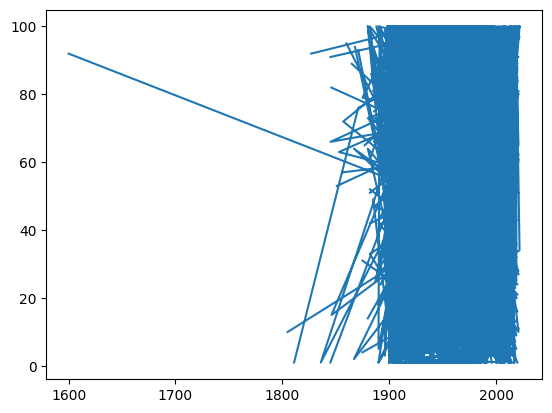

In [20]:
plt.plot(df_wrangling.Year_Built, df_wrangling.Energy_Star_Score)
plt.show()

In [21]:
df_subset = df_wrangling[df_wrangling['Year_Built'] > 1800].dropna(subset=['Energy_Star_Score']).groupby('Year_Built')['Energy_Star_Score'].mean()
df_subset = pd.DataFrame(df_subset)
df_subset.reset_index(inplace=True)

##### Line Graph - MatPlotLib

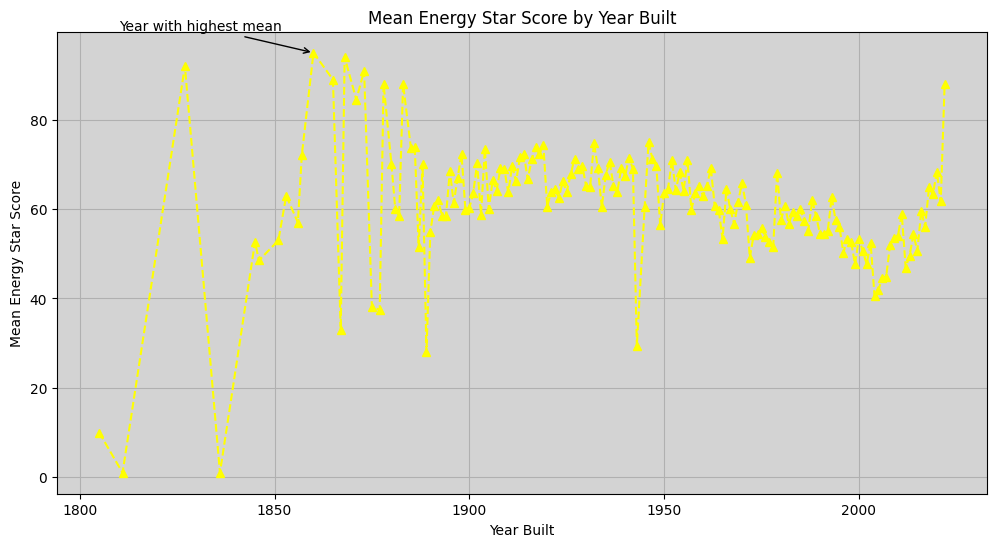

In [22]:
max_index = df_subset['Energy_Star_Score'].idxmax() #Searches my dataframe for the largest value in Energy_Star_Score and sets it (will be important later)
plt.figure(figsize=(12, 6)) # Changes the size of the plot
plt.rcParams['axes.facecolor'] = 'lightgrey' # I wanted a light grey background and an electric yellow color for the plot
plt.plot(df_subset['Year_Built'], df_subset['Energy_Star_Score'], marker='^', linestyle='--', color='yellow')# ploting the x and y and changing their market, line and color
plt.title('Mean Energy Star Score by Year Built', fontsize = 12) # Offsetting the title, and axis title sizes
plt.xlabel('Year Built', fontsize = 10)# Offsetting the title, and axis title sizes
plt.ylabel('Mean Energy Star Score', fontsize = 10)# Offsetting the title, and axis title sizes
plt.grid(True) # Creates a grid for better viewing

plt.annotate('Year with highest mean', xy=(df_subset['Year_Built'][max_index], df_subset['Energy_Star_Score'][max_index]),
    xytext=(df_subset['Year_Built'][max_index] - 50, df_subset['Energy_Star_Score'][max_index] + 5),
    arrowprops=dict(facecolor='yellow', arrowstyle='->')) # I wanted to show the point of which year had the highest mean energy score, since the data is so crowded

plt.show()

Line Graph- This plot represents a time series of only my yearly grouped data on the x axis and the mean Energy Star Scores (grouped by year) on the y axis. I set out to see if the Energy efficiency has changed at all in new NYC buildings. By this time series it has seemingly gotten worse.

This data is tricky to read, from the initial looks of it older NYC buildings are more more energy efficent than the newest buildings. Maybe new groupings and visuzlizations can tell otherwise. Can a grouping of year and property type make sense of this weird trend?

##### Heat Map - MatPlotLib

In [23]:

df_subset_2 = df_wrangling[df_wrangling['Year_Built'] > 1800].dropna(subset=['Energy_Star_Score']).groupby(['Year_Built', 'Primary_Property_Type'])['Energy_Star_Score'].mean()
df_subset_2 = pd.DataFrame(df_subset_2)
df_subset_2.reset_index(inplace=True)

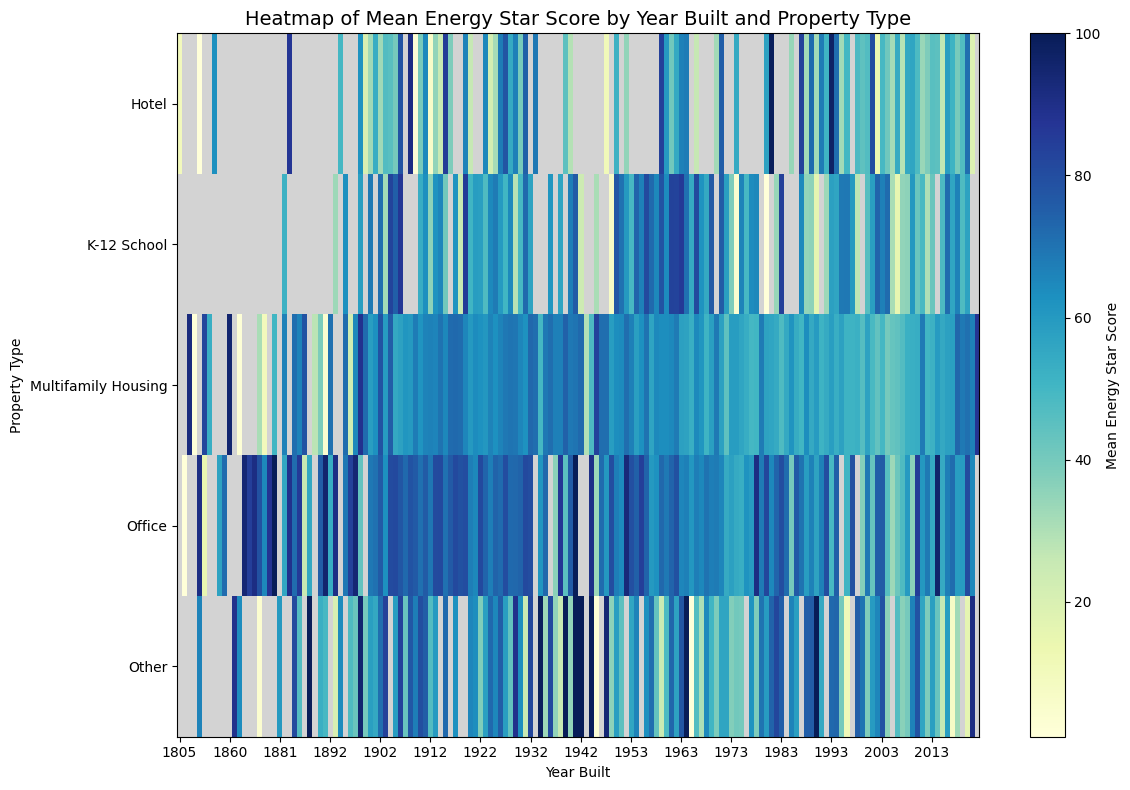

In [24]:
# I need to extract the unique values of my grouping variables so they can be fed into the function
year_built_unique = np.sort(df_subset_2['Year_Built'].unique())
property_types_unique = np.sort(df_subset_2['Primary_Property_Type'].unique())

# This is an empty matrix that the unique values from above will be put into (in zeros)
heatmap_data = np.zeros((len(property_types_unique), len(year_built_unique)))

# Fill the heatmap_data matrix with mean Energy_Star_Score values
for i, prop_type in enumerate(property_types_unique):
    for j, year_built in enumerate(year_built_unique):
        mean_score = df_subset_2[(df_subset_2['Primary_Property_Type'] == prop_type) & 
                                 (df_subset_2['Year_Built'] == year_built)]['Energy_Star_Score'].mean()
        heatmap_data[i, j] = mean_score

# Plot the heatmap
plt.figure(figsize=(12, 8)) # Making the aspect ratio slightly larger to view the data easier
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Mean Energy Star Score') # Labeling the colorbar, or ledgend
plt.title('Heatmap of Mean Energy Star Score by Year Built and Property Type', fontsize = 14) # Again, offsetting the font size of the title, x and y axis labels
plt.xlabel('Year Built', fontsize = 10)
plt.ylabel('Property Type', fontsize = 10)

# Set x-axis ticks every 10 years
tick_positions = np.arange(0, len(year_built_unique), 10) #the ticks end up at weird intervals, but i needed to cut them down somehow for visibililty
plt.xticks(tick_positions, year_built_unique[tick_positions], rotation=0)# Makes x-axis labels at zero rotation, the rotation from above (90 degrees) is not needed here

plt.yticks(np.arange(len(property_types_unique)), property_types_unique)
plt.tight_layout()
plt.show()

This heatmap graph's purpose is to display the energy star scores grouped on both year and property type and see why the energy effeciency has dropped.From the extra group the 1850-1900 period (highest average efficiency period) had a high concentration of high efficiency Office Buildings and Schools.

### Part 1: Shift to Seaborn

##### Using sns.lineplot

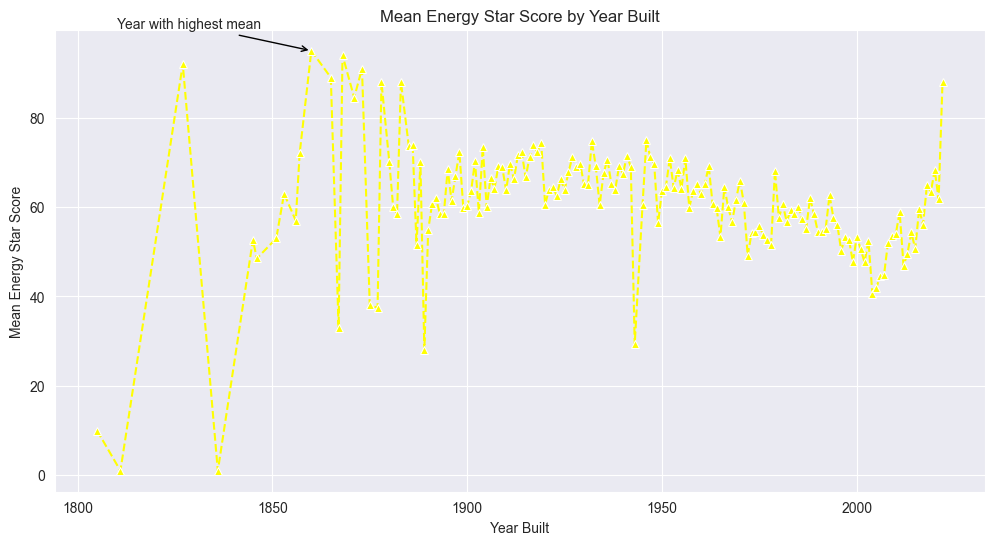

In [25]:
max_index = df_subset['Energy_Star_Score'].idxmax()

# Set Seaborn style
sns.set_style('darkgrid') ##Not changing anything from white grid

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_subset, x='Year_Built', y='Energy_Star_Score', marker='^', linestyle='--', color='yellow')

# Title and axis labels with adjusted font sizes
plt.title('Mean Energy Star Score by Year Built', fontsize=12)
plt.xlabel('Year Built', fontsize=10)
plt.ylabel('Mean Energy Star Score', fontsize=10)

# Annotate the point with the highest mean energy score
plt.annotate('Year with highest mean', xy=(df_subset['Year_Built'][max_index], df_subset['Energy_Star_Score'][max_index]),
             xytext=(df_subset['Year_Built'][max_index] - 50, df_subset['Energy_Star_Score'][max_index] + 5),
             arrowprops=dict(facecolor='yellow', edgecolor='black', arrowstyle='->')) # This didnt change from the previous matplot, but I did have to change the arrow color

plt.show()

Line Graph- This plot represents a time series of only my yearly grouped data on the x axis and the mean Energy Star Scores (grouped by year) on the y axis. I set out to see if the Energy efficiency has changed at all in new NYC buildings. By this time series it has seemingly gotten worse.

##### Using sns.relplot

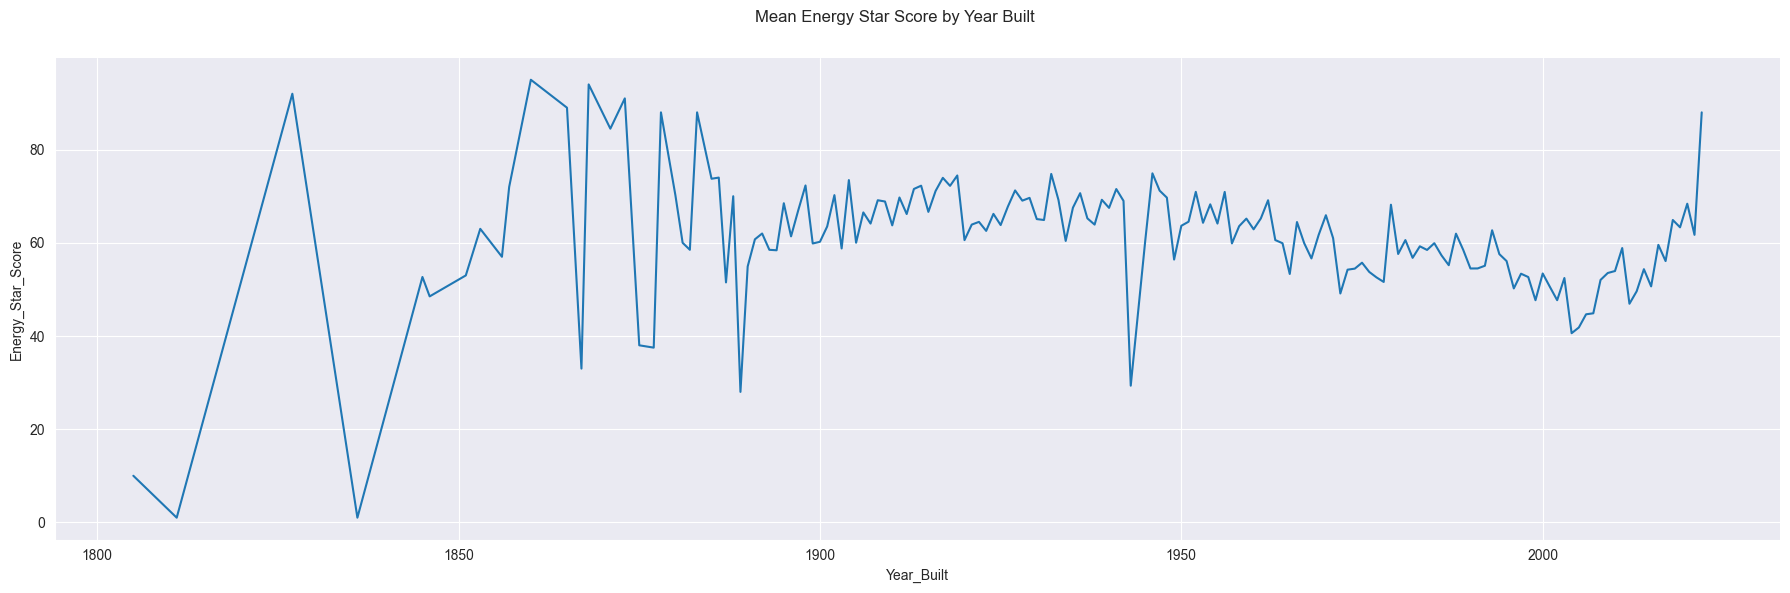

In [26]:
plot = sns.relplot(
    data=df_subset, kind="line",
    x="Year_Built", y="Energy_Star_Score",
    height=6, aspect=3 
)

# Add title using Matplotlib
plt.subplots_adjust(top=0.9)  # Adjust the plot layout
plot.fig.suptitle('Mean Energy Star Score by Year Built', fontsize=12)

plt.show()

Line Graph- This plot represents a time series of only my yearly grouped data on the x axis and the mean Energy Star Scores (grouped by year) on the y axis. I set out to see if the Energy efficiency has changed at all in new NYC buildings. By this time series it has seemingly gotten worse.

##### Trying Seaborn's heatmap capabilities

C:\Users\Jonathan Burns\AppData\Local\Temp\ipykernel_19204\2077072411.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.at[prop_type, year_built] = mean_score
C:\Users\Jonathan Burns\AppData\Local\Temp\ipykernel_19204\2077072411.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.at[prop_type, year_built] = mean_score
C:\Users\Jonathan Burns\AppData\Local\Temp\ipykernel_19204\2077072411.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype fi

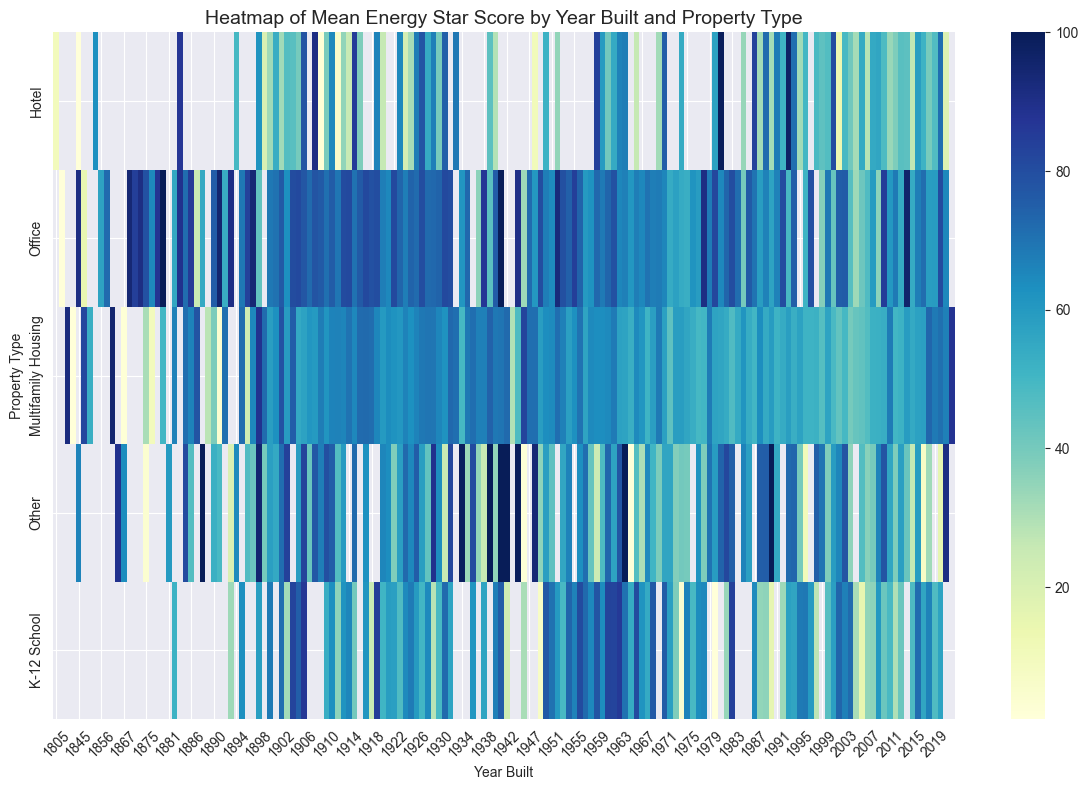

In [27]:
df_subset_2 = df_wrangling[df_wrangling['Year_Built'] > 1800].dropna(subset=['Energy_Star_Score']).groupby(['Year_Built', 'Primary_Property_Type'])['Energy_Star_Score'].mean()
df_subset_2 = pd.DataFrame(df_subset_2)
df_subset_2.reset_index(inplace=True)

year_built_unique = df_subset_2['Year_Built'].unique()
property_types_unique = df_subset_2['Primary_Property_Type'].unique()

# Create a DataFrame with zeros
heatmap_data = pd.DataFrame(0, index=property_types_unique, columns=year_built_unique)

# Fill the heatmap_data DataFrame with mean Energy_Star_Score values
for prop_type in property_types_unique:
    for year_built in year_built_unique:
        mean_score = df_subset_2[(df_subset_2['Primary_Property_Type'] == prop_type) & 
                                 (df_subset_2['Year_Built'] == year_built)]['Energy_Star_Score'].mean()
        heatmap_data.at[prop_type, year_built] = mean_score

# Plot the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')

# Add title and labels
plt.title('Heatmap of Mean Energy Star Score by Year Built and Property Type', fontsize=14)
plt.xlabel('Year Built', fontsize=10)
plt.ylabel('Property Type', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This heatmap graph's purpose is to display the energy star scores grouped on both year and property type and see why the energy effeciency has dropped.From the extra group the 1850-1900 period (highest average efficiency period) had a high concentration of high efficiency Office Buildings and Schools.

#### Differences between Seaborn and MatPlotLib
Seaborn and MatPlotLib are as different from each other as they are the same. Just by evaluating these two plots that are more on the basic side I can see their similarities and differences playing out. To start, MatPlotLib's additive functions make it easier for layering different themes and items. However this can get messy and can often times be confusing if too many things are added to a plot. On the otherhand Seaborn presents a simple, clean approach to plotting, but also relies on adding in MatPlot statements for anything more involved than making titles. The Seaborn plots were very easy to translate base level, but any of the added complexities were harder than MatPlot. I think if I were to really need to drill down into more of this data I would try to use Seaborn's more advanced plots like Violin or Pair plots.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

This intitial look into energy efficiency of NYC Buildings proved fruitful. By grouping on only the Year_Built variable I was able to highlight an overall change in energy efficiency. For the time, what little electricity there was to go around, NYC buidings were highly efficient in other areas. Note that really for any building before the 1900's electicity efficiency was not a big deal, electricity was discovered in 1882 and was not heavily used until around 1925, when 50% of American Households had it. So for properties before this era in NYC, energy consumption was based on primarily wood and coal. This all begs the question of why is average energy efficiency seemingly decreasing across all NYC buildings as time progresses and why does efficiency spike at the end of the dataset? While the answers to these questions were not solved, I believe that the answer to the spike at the end of the period could be due to urban flight experienced during COVID-19. Maybe less people in buildings across the city during 2020 meant that there was much less energy use, making the numbers seem greater than the reality? To truly answer this I believe much more statistical work is required, controlling for COVID years. 